# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_ID)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_data = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
summary_statistics = grouped_data.agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volum_Std_Err='sem'
)

summary_statistics.head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volum_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    mean ='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

summary.head()
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

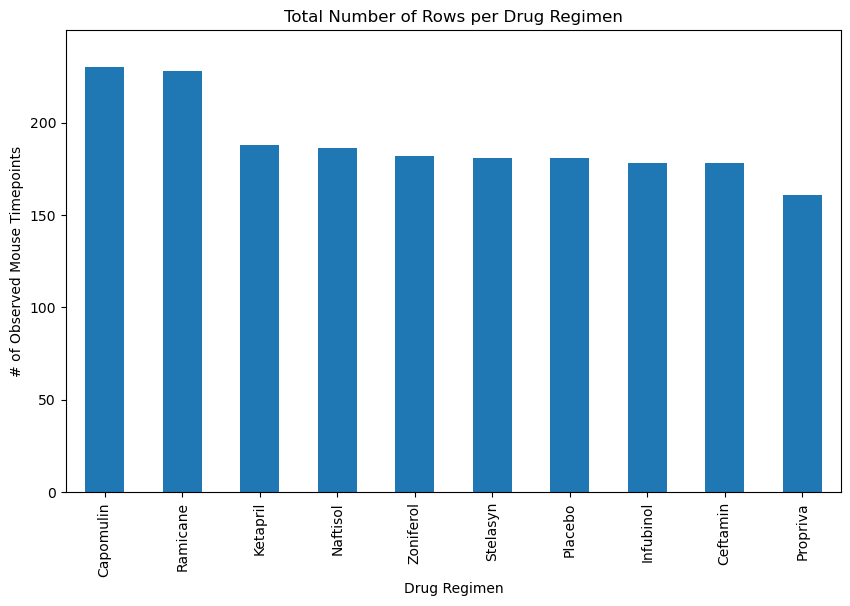

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen = combined_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10,6))
regimen.plot(kind='bar', title='Total Number of Rows per Drug Regimen', ylim=(0,250))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.yticks(range(0, 201, 50))
plt.show()

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen = combined_data['Drug Regimen'].value_counts()
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.yticks(range(0, 201, 50))

plt.show()

NameError: name 'regimen_counts' is not defined

<Figure size 1000x600 with 0 Axes>

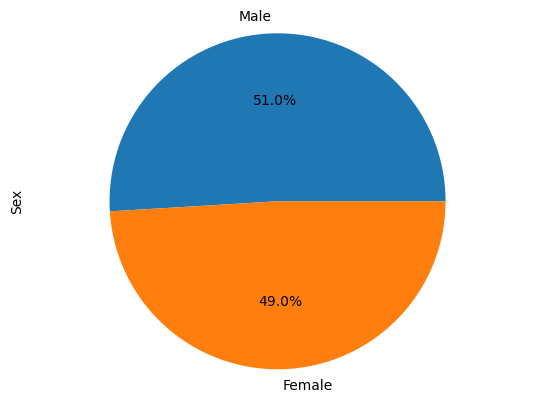

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = clean_data['Sex'].value_counts()
gender.plot(kind='pie', autopct='%1.1f%%', startangle=0, ylabel='Sex')
plt.axis('equal')
plt.show()

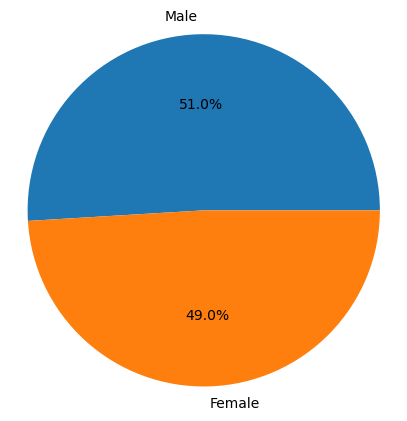

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = clean_data['Sex'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal') 

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimens_to_include = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_results = clean_data[clean_data['Drug Regimen'].isin(regimens_to_include)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_results.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoint, filtered_results, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    regimen_data = clean_data[clean_data['Drug Regimen'] == treatment]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = regimen_data['Tumor Volume (mm3)']
    
    # add subset 
    q1 = tumor_volumes.quantile(0.25)
    q3 = tumor_volumes.quantile(0.75)
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers:")
    display(outliers.head())

Capomulin's potential outliers:


1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:


1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers:


Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers:


Series([], Name: Tumor Volume (mm3), dtype: float64)

<Figure size 1000x600 with 0 Axes>

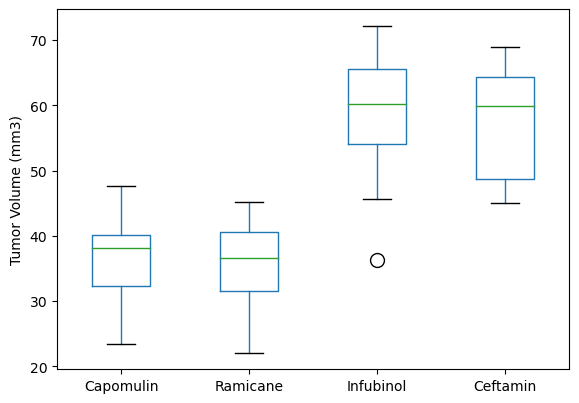

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_results = clean_data[clean_data['Drug Regimen'].isin(treatments)]

last_timepoint = filtered_results.groupby('Mouse ID')['Timepoint'].max().reset_index()
final_tumor_volume = pd.merge(last_timepoint, filtered_results, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume['Drug Regimen'] = pd.Categorical(final_tumor_volume['Drug Regimen'], categories=treatments, ordered=True)
plt.figure(figsize=(10, 6))
flierprops  = dict(marker='o', color='r', markersize=10)
final_tumor_volume.boxplot(column='Tumor Volume (mm3)', by='Drug Regimen', grid=False, flierprops=flierprops)
plt.title('')
plt.suptitle('')  
plt.xlabel('')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

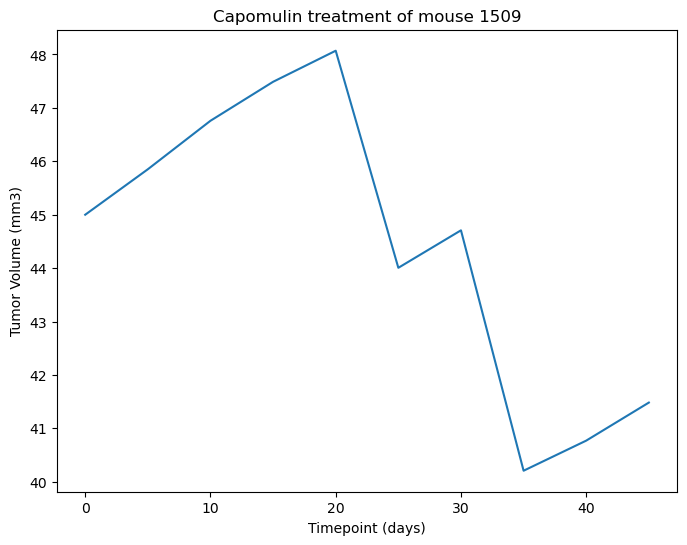

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_results = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
single_mouse_id = 'l509'
single_mouse_data = capomulin_results[capomulin_results['Mouse ID'] == single_mouse_id]
plt.figure(figsize=(8, 6))
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse 1509')
plt.grid(False)
plt.show()

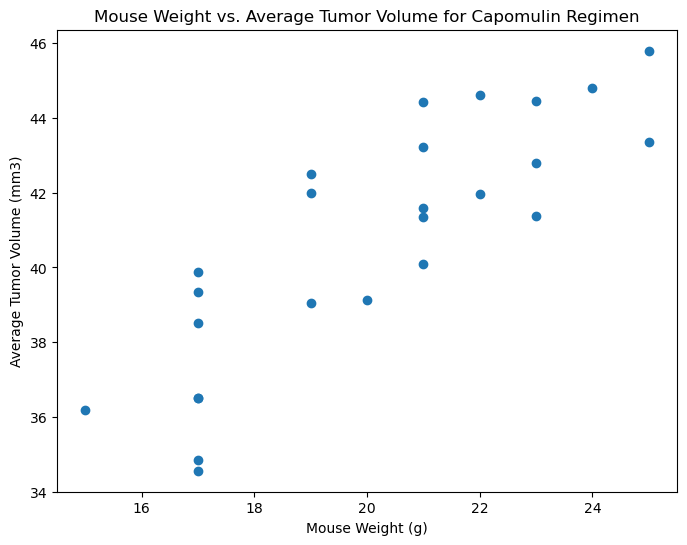

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_results = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_results.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'}, inplace=True)
capomulin_combined = pd.merge(avg_tumor_vol, mouse_metadata, on='Mouse ID')
plt.figure(figsize=(8, 6))
plt.scatter(capomulin_combined['Weight (g)'], capomulin_combined['Avg Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()

## Correlation and Regression

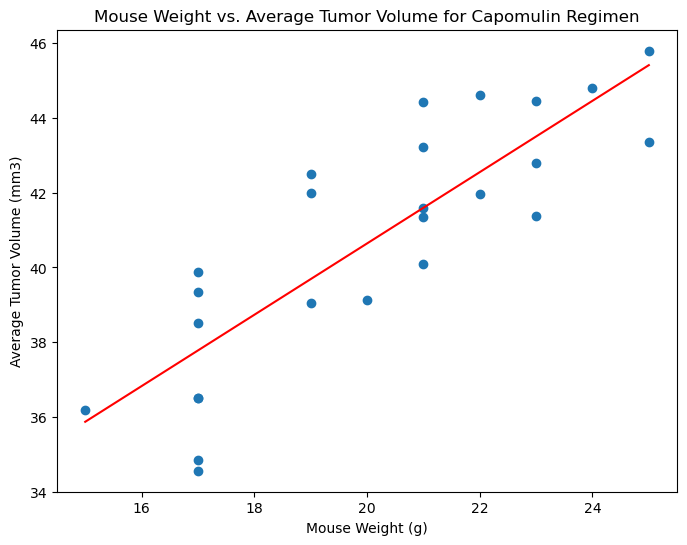

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_results = clean_data[clean_data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_results.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
avg_tumor_vol.rename(columns={'Tumor Volume (mm3)': 'Avg Tumor Volume (mm3)'}, inplace=True)
capomulin_combined = pd.merge(avg_tumor_vol, mouse_metadata, on='Mouse ID')
x = capomulin_combined['Weight (g)']
y = capomulin_combined['Avg Tumor Volume (mm3)']
slope = (len(x) * sum(x*y) - sum(x) * sum(y)) / (len(x) * sum(x*x) - sum(x)**2)
intercept = (sum(y) - slope * sum(x)) / len(x)
x_values = pd.Series([x.min(), x.max()])
y_values = intercept + slope * x_values
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Data')
plt.plot(x_values, y_values, color='red', label='Fit')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.show()